## Topic Modeling

## Open the file

In [22]:
import pandas as pd
file =file = "C:\\Users\\keert\\Downloads\\un-general-debates-blueprint (1).csv"
df = pd.read_csv(file)
df.head(20) 

session  year country                     country_name  \
0        25  1970     ALB                          Albania   
1        25  1970     ARG                        Argentina   
2        25  1970     AUS                        Australia   
3        25  1970     AUT                          Austria   
4        25  1970     BEL                          Belgium   
5        25  1970     BLR                          Belarus   
6        25  1970     BOL  Bolivia, Plurinational State of   
7        25  1970     BRA                           Brazil   
8        25  1970     CAN                           Canada   
9        25  1970     CMR                         Cameroon   
10       25  1970     COG                            Congo   
11       25  1970     COL                         Colombia   
12       25  1970     CRI                       Costa Rica   
13       25  1970     CUB                             Cuba   
14       25  1970     DOM               Dominican Republic   
15       25  1970     DZA                          Algeria   
16       25  1970     ECU                          Ecuador   
17       25  1970     FRA                           France   
18       25  1970     GBR                   United Kingdom   
19       25  1970     GHA                            Ghana   

                  speaker    position  \
0                 Mr. NAS         NaN   
1      Mr. DE PABLO PARDO         NaN   
2             Mr. McMAHON         NaN   
3      Mr. KIRCHSCHLAEGER         NaN   
4              Mr. HARMEL         NaN   
5          Mr. GURINOVICH         NaN   
6      Mr. CAMACHO OMISTE         NaN   
7      Mr. GIBSON BARBOZA         NaN   
8               Mr. SHARP         NaN   
9              Mr. AHIDJO  President    
10            Mr. ICKONGA         NaN   
11  Mr. VASQUEZ CARRIZOSA         NaN   
12              Mr. FACIO         NaN   
13            Mr. ALARCON         NaN   
14        Mr FERNANDEZ G.               
15              Mr. YAZID         NaN   
16            Mr. Benites         NaN   
17           Mr. SCHUMANN         NaN   
18   Sir Alec DOUGLASHOME         NaN   
19              Mr. OWUSU         NaN   

                                                 text  
0   33: May I first convey to our President the co...  
1   177.\t : It is a fortunate coincidence that pr...  
2   100.\t  It is a pleasure for me to extend to y...  
3   155.\t  May I begin by expressing to Ambassado...  
4   176. No doubt each of us, before coming up to ...  
5   \n71.\t. We are today mourning the untimely de...  
6   135.\t  I wish to congratulate the President o...  
7   1.\tMr. President, I should like, first of all...  
8   \nThe General Assembly is fortunate indeed to ...  
9   : A year ago I came here as the Acting Preside...  
10  122.\t  I cannot begin my intervention without...  
11  Mr. President, this visit to the United Nation...  
12  62.\t  Mr. President, your election to the Pre...  
13  1.\t  Mr. President, I should first like to co...  
14  \n\n\n Mr. President, it was a source of great...  
15  1.  The delegation of Algeria is very pleased ...  
16  71.  It had been my hope that a loftier person...  
17  84.\t  Within one month, when we celebrate the...  
18  110.\t Mr. President, I should like first to s...  
19  121.\t I should like to begin by congratulatin...

## Look at a couple of texts

In [23]:
print(repr(df.iloc[2666]["text"][0:400]))
print(repr(df.iloc[4726]["text"][0:400]))

'\ufeffIt is indeed a pleasure for me and the members of my delegation to extend to Ambassador Garba our sincere congratulations on his election to the presidency of the forty-fourth session of the General Assembly. His election to this high office is a well-deserved tribute to his personal qualities and experience. I am fully confident that under his able and wise leadership the Assembly will further c'
'\ufeffI wish to join\nother representatives in congratulating you, Sir, on\nyour unanimous election as President of the fifty-sixth\nsession of the General Assembly. We are confident that\n27\n\nunder your able guidance the work of this General\nAssembly session will be another milestone on the new\ninternational scene, particularly in confronting the new\nchallenges facing our world, especially after the\nextre'


## We will split speech into sentences

In [24]:
# Using regular expression splitting the text
import re
df["paragraphs"] = df["text"].map(lambda text: re.split('\.\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)


<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\keert\AppData\Local\Temp\ipykernel_7728\1419122732.py:3: SyntaxWarning: invalid escape sequence '\.'
  df["paragraphs"] = df["text"].map(lambda text: re.split('\.\s*\n', text))


## Start by getting TFIDF

In [25]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert stop words set to a list
stopwords_list = list(stopwords)

# Initialize TfidfVectorizer with the list of stop words
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform the text data
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['text'])
tfidf_text_vectors.shape

C:\Users\keert\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(7507, 24611)

In [27]:
# flatten the paragraphs keeping the years
paragraph_df = pd.DataFrame([{ "text": paragraph, "year": year }
for paragraphs, year in zip(df["paragraphs"], df["year"])
for paragraph in paragraphs if paragraph])
paragraph_df.head(10)

text  year
0  33: May I first convey to our President the co...  1970
1  35.\tThe utilization of the United Nations to ...  1970
2  36.\tThe whole of progressive mankind recalls ...  1970
3  37.\tAll this has had well known consequences ...  1970
4  38.\tOne of the undeniable proofs that the Uni...  1970
5  39.\tUndoubtedly, such a state of affairs in t...  1970
6  40.\tThe liberation movement at the world leve...  1970
7  41.\tPanic-stricken at the impetuous growth of...  1970
8  42.\tAlthough split by numerous contradictions...  1970
9  43.\tIn that connexion we can cite, simultaneo...  1970

## Get the TFIDF of the sentences DF

In [28]:
tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["text"])
tfidf_para_vectors.shape


InvalidParameterError: The 'stop_words' parameter of TfidfVectorizer must be a str among {'english'}, an instance of 'list' or None. Got {'mostly', 'per', '‘s', 'wherein', 'before', 'done', 'has', '‘ve', 'third', 'over', 'move', 'between', '’d', '‘m', 'hereupon', 'out', 'front', 'whoever', 'everyone', 'be', 'whole', 'four', 'full', 'hereby', 'latter', 'further', 'whereupon', 'thence', 'while', 'my', 'both', 'without', 'among', 'himself', 'towards', 'amount', 'anywhere', 'amongst', 'too', '’ll', 'from', 'quite', 'of', 'toward', 'to', 'not', 'almost', 'much', 'below', 'serious', 'and', 'this', 'any', 'besides', 'same', 'i', 'may', 'whereas', 'anything', 'ca', "'ll", 'noone', 'whatever', 'although', 'name', 'see', 'at', 'most', 'still', 'have', 'throughout', 'part', 'beyond', 'seemed', 'she', 'seem', 'except', 'other', 'upon', "'ve", 'whereafter', 'fifteen', 'alone', 'give', 'cannot', 'former', 'eleven', 'well', 'within', 'otherwise', 'whose', 'during', 'every', 'hence', 'hereafter', 'forty', 'such', 'top', 'your', 'nobody', 'there', 'on', 'how', 'became', 'everything', 'five', 'does', 'whom', "n't", 'can', 'been', 'becomes', 'make', 'yet', 'hers', 'thus', 'or', 'ours', 'an', 'hundred', 'could', 'latterly', 'then', 'those', '’s', 'her', 'ourselves', 'really', 'whence', 'always', 'seems', 'after', "'d", "'m", 'nor', 'along', "'re", '‘ll', 'if', 'being', '’ve', 'onto', 'six', 'go', 'now', 'therein', 'as', 'bottom', 'thereby', 'beside', 'somewhere', 'herein', 'down', 'various', 'by', '‘d', 'had', 'whither', 'elsewhere', 'we', 'put', 'these', 'thereupon', 'is', 'yourselves', 'no', 'due', 'please', 'whenever', 'many', 'another', 'did', 'what', 'empty', 'unless', 'one', 'its', 'them', 'though', 'show', 'others', 'sometimes', 'two', 'their', 'least', 'into', 'a', 'they', 'three', 'just', 'in', 'behind', 'you', 'becoming', 'keep', 'regarding', 'nevertheless', 'each', 'else', 'rather', 'itself', 'n‘t', 'should', 'but', 'seeming', 'even', 'twelve', 'twenty', 'often', 'sometime', 'here', 'own', 'until', 'the', 'next', 'with', 'than', 'do', 'together', 'thereafter', 'am', 'me', '’re', 're', 'that', 'who', 'sixty', 'somehow', 'would', 'get', 'neither', 'n’t', 'using', '‘re', 'some', 'fifty', 'when', 'up', 'themselves', 'beforehand', 'namely', 'was', 'so', 'more', 'anyhow', 'doing', 'indeed', 'become', 'yourself', 'formerly', 'for', 'made', 'around', 'already', 'only', 'ten', 'myself', 'through', 'several', 'enough', 'whereby', 'back', 'us', 'off', 'call', 'him', 'say', 'anyone', 'mine', 'eight', 'moreover', 'however', 'nothing', 'might', 'nine', 'against', 'ever', 'thru', "'s", 'all', 'perhaps', 'whether', 'under', '’m', 'which', 'very', 'last', 'where', 'something', 'either', 'once', 'about', 'none', 'he', 'via', 'across', 'therefore', 'less', 'yours', 'take', 'our', 'never', 'few', 'are', 'were', 'will', 'it', 'first', 'someone', 'wherever', 'meanwhile', 'above', 'nowhere', 'afterwards', 'must', 'used', 'side', 'his', 'why', 'everywhere', 'herself', 'also', 'again', 'because', 'anyway', 'since'} instead.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Use 'english' instead of the set of stop words
tfidf_para_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["text"])
tfidf_para_vectors.shape

(279076, 25156)

In [30]:
from sklearn.decomposition import NMF
nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

C:\Users\keert\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [31]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]],
                                   abs(words[largest[i]] * 100.0 / total)))

# Call the function outside its definition with the appropriate arguments
display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())



Topic 00
 co (0.79)
 operation (0.65)
 disarmament (0.36)
 nuclear (0.34)
 relations (0.25)

Topic 01
 terrorism (0.38)
 challenges (0.32)
 sustainable (0.30)
 millennium (0.29)
 reform (0.28)

Topic 02
 africa (1.15)
 african (0.82)
 south (0.63)
 namibia (0.36)
 delegation (0.30)

Topic 03
 arab (1.02)
 israel (0.89)
 palestinian (0.60)
 lebanon (0.54)
 israeli (0.54)

Topic 04
 american (0.33)
 america (0.31)
 latin (0.31)
 panama (0.21)
 bolivia (0.21)

Topic 05
 pacific (1.55)
 islands (1.23)
 solomon (0.86)
 island (0.82)
 fiji (0.71)

Topic 06
 soviet (0.81)
 republic (0.78)
 nuclear (0.68)
 viet (0.64)
 socialist (0.63)

Topic 07
 guinea (4.26)
 equatorial (1.75)
 bissau (1.53)
 papua (1.47)
 republic (0.57)

Topic 08
 european (0.61)
 europe (0.44)
 cooperation (0.39)
 bosnia (0.34)
 herzegovina (0.30)

Topic 09
 caribbean (0.98)
 small (0.66)
 bahamas (0.63)
 saint (0.63)
 barbados (0.61)


In [32]:
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())



Topic 00
 international (2.01)
 world (1.50)
 community (0.91)
 new (0.76)
 peace (0.67)

Topic 01
 general (2.88)
 session (2.85)
 assembly (2.83)
 mr (2.00)
 president (1.83)

Topic 02
 countries (4.41)
 developing (2.49)
 economic (1.51)
 developed (1.35)
 trade (0.92)

Topic 03
 nations (5.61)
 united (5.50)
 organization (1.27)
 states (1.03)
 charter (0.93)

Topic 04
 nuclear (4.91)
 weapons (3.25)
 disarmament (2.01)
 treaty (1.70)
 proliferation (1.45)

Topic 05
 rights (6.51)
 human (6.20)
 respect (1.16)
 fundamental (0.86)
 universal (0.83)

Topic 06
 africa (3.80)
 south (3.30)
 african (1.70)
 namibia (1.38)
 apartheid (1.18)

Topic 07
 security (6.08)
 council (5.82)
 permanent (1.48)
 reform (1.47)
 peace (1.31)

Topic 08
 people (1.35)
 peace (1.32)
 east (1.28)
 middle (1.17)
 palestinian (1.15)

Topic 09
 development (4.51)
 sustainable (1.20)
 economic (1.07)
 social (1.00)
 goals (0.94)


In [33]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([11.06189432, 17.0213082 , 13.6565622 , 10.18695452, 11.35821532,
        5.95003141,  7.90001101,  4.13937503, 11.91132462,  6.81432338])

In [34]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([11.99461472, 10.12384143, 10.13359996, 14.58547101,  6.74889346,
        7.06521386,  8.61823051,  8.23846492, 11.85285437, 10.63881575])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert the set of stopwords to a list
stopwords_list = list(stopwords)

# Assuming 'paragraph_df' is defined earlier
count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["text"])

# Check the shape of the document-term matrix
print("Shape of document-term matrix:", count_para_vectors.shape)

# Define and fit the LDA model
lda_para_model = LatentDirichletAllocation(n_components=10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

C:\Users\keert\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


Shape of document-term matrix: (279076, 25162)


In [49]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the stop words set to a list

stopwords_list = list(stopwords)

# Initialize CountVectorizer with the list of stop words
count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform the text data
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["text"])
print(count_para_vectors.shape)


C:\Users\keert\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(279076, 25162)


In [47]:
def display_topics(model, feature_names, no_top_words=5):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic %d:" % (topic_idx + 1))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Get feature names from the vocabulary generated by CountVectorizer
feature_names = count_para_vectorizer.get_feature_names_out()

# Display topics using the vocabulary generated by CountVectorizer
display_topics(lda_para_model, feature_names)


Topic 1:
exerts grouping aguirre 164 reconfiguration

Topic 2:
tyrol ness characterize unauthorized rein

Topic 3:
fire bounce enthusiastically chancelleries disgusted

Topic 4:
delicacy bio instigators echeverria ray

Topic 5:
irreparable peshawar gorge impossible furtherance

Topic 6:
predatory resolutions specialization oftentimes 6191

Topic 7:
maintaining unnecessary 193rd municipality box

Topic 8:
impracticable likened explains subsidies defame

Topic 9:
beninese harsher exclusiveness thirteen bloodied

Topic 10:
chronicles widows 309 imparted identity


In [50]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

NameError: name 'W_lda_para_matrix' is not defined

In [39]:
!pip install pyLDAvis
!pip install pyLDAvis.sklearn

  Using cached pyLDAvis-3.4.1-py3-none-any.whl.metadata (4.2 kB)
  Using cached numexpr-2.10.0-cp312-cp312-win_amd64.whl.metadata (8.1 kB)
  Using cached funcy-2.0-py2.py3-none-any.whl.metadata (5.9 kB)
  Using cached gensim-4.3.2.tar.gz (23.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
Using cached funcy-2.0-py2.py3-none-any.whl (30 kB)
Using cached numexpr-2.10.0-cp312-cp312-win_amd64.whl (97 kB)
Failed to build gensim


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [714 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-312
  creating build\lib.win-amd64-cpython-312\gensim
  copying gensim\downloader.py -> build\lib.win-amd64-cpython-312\gensim
  copying gensim\interfaces.py -> build\lib.win-amd64-cpython-312\gensim
  copying gensim\matutils.py -> build\lib.win-amd64-cpython-312\gensim
  copying gensim\nosy.py -> build\lib.win-amd64-cpython-312\gensim
  copying gensim\utils.py -> build\lib.win-amd64-cpython-312\gensim
  copying gensim\__init__.py -> build\lib.win-amd64-cpython-312\gensim
  creating build\lib.win-amd64-cpython-312\gensim\corpora
  copying gensim\corpora\bleicorpus.py -> build\lib.win-amd64-cpython-312\gensim\corpora
  copying gensim\corpora\csvcorpus.py -> build\lib.win-amd64-cpython-312\gensim\corpora
  copying gensim\corpora\dictionary.py -> build\lib.win-amd64-cpython-312\gensim\corpora
  c

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display, HTML

display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

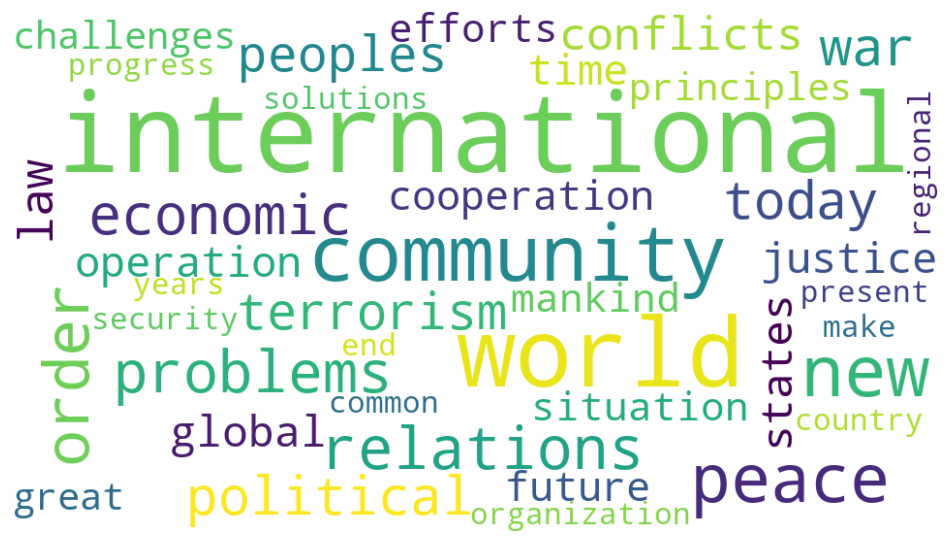

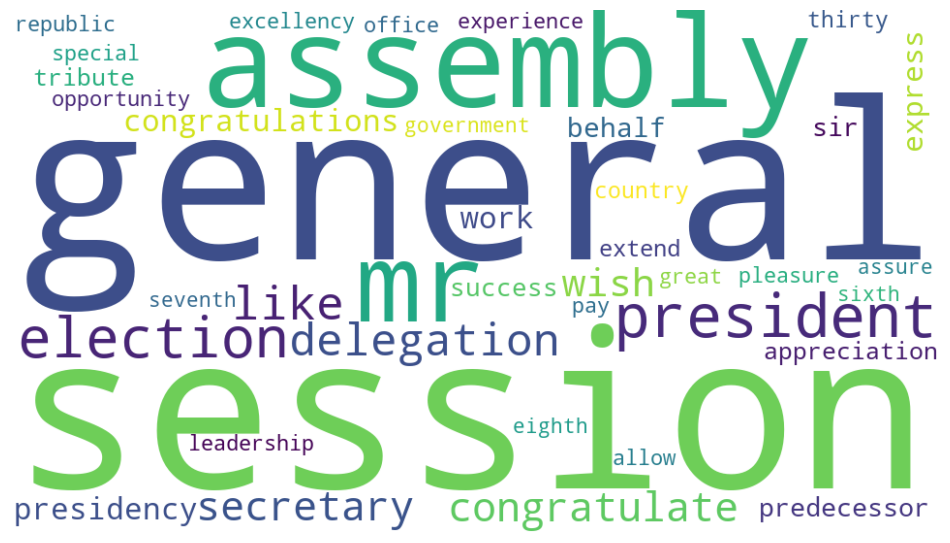

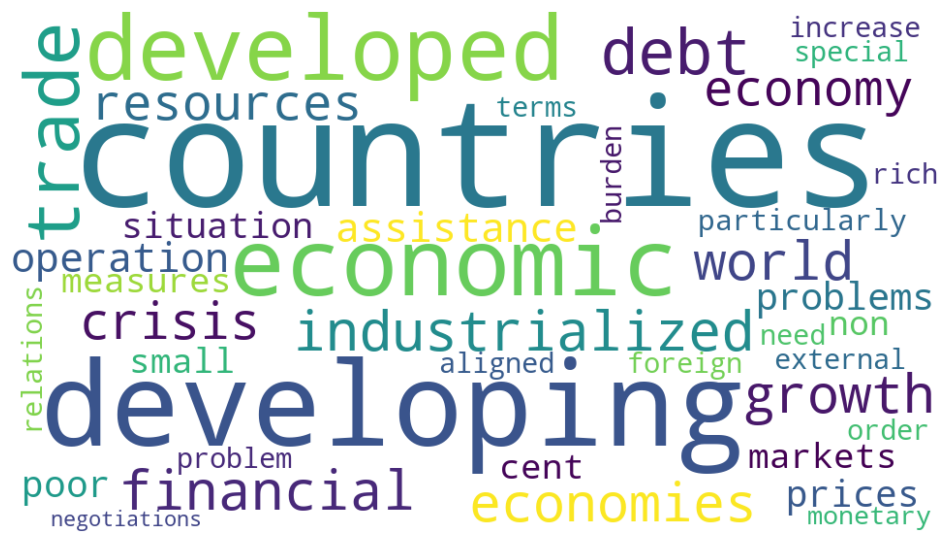

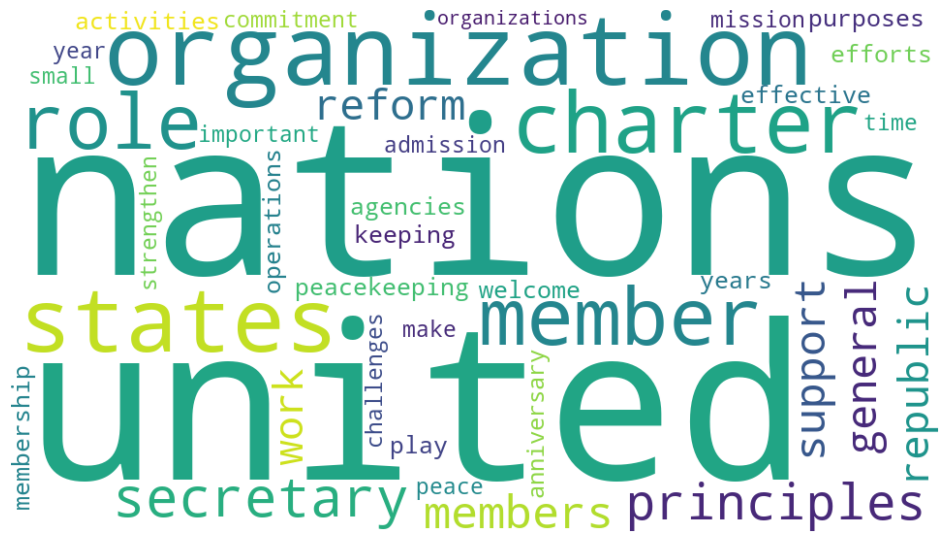

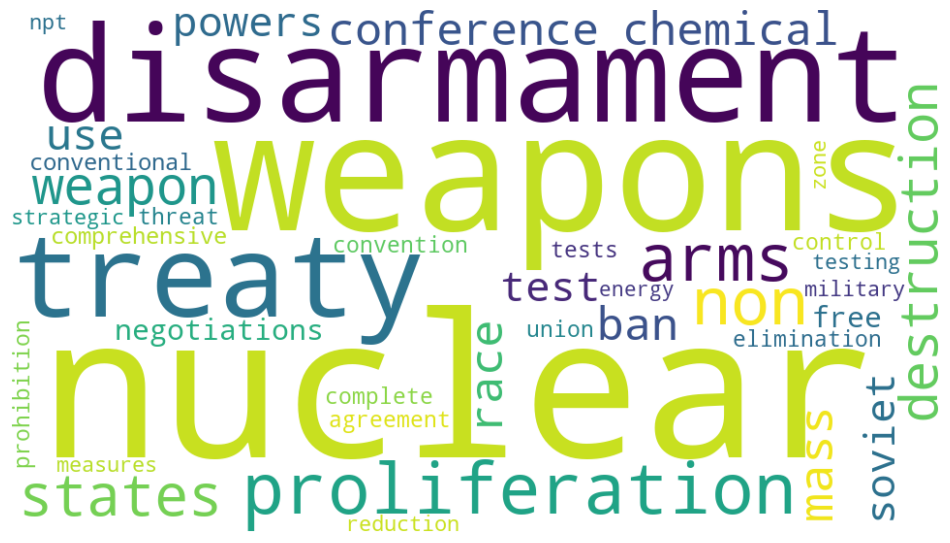

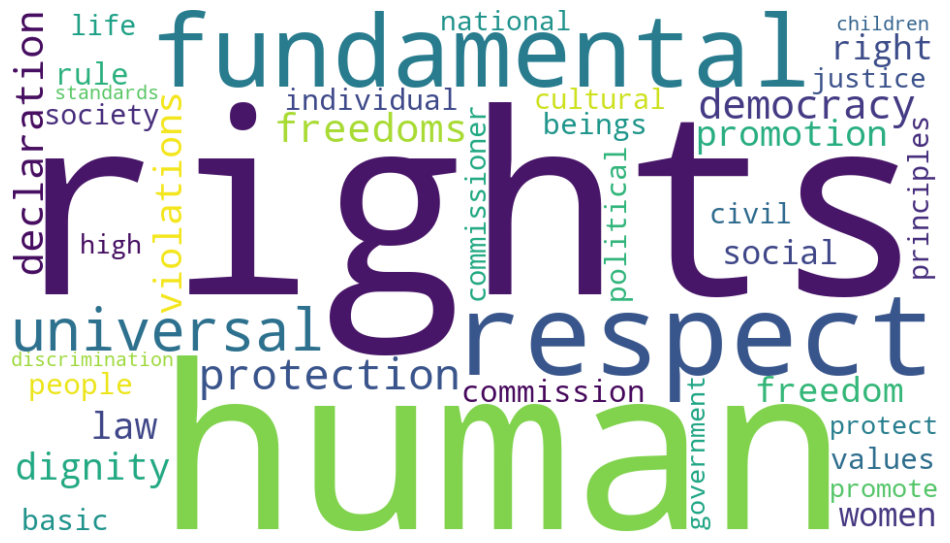

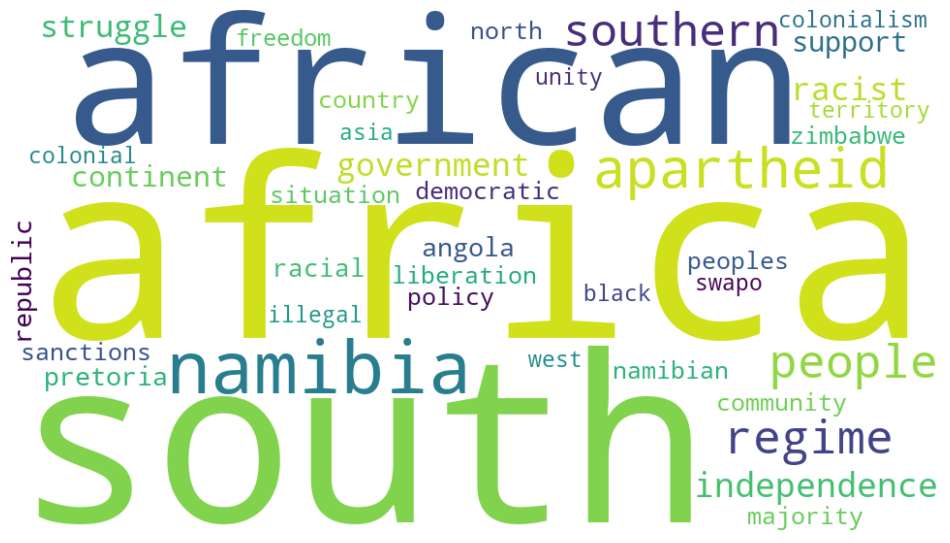

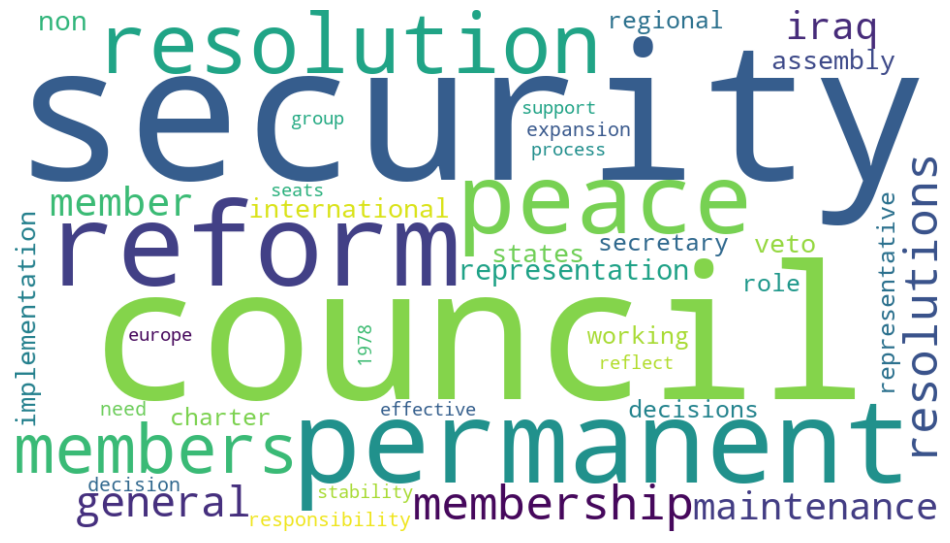

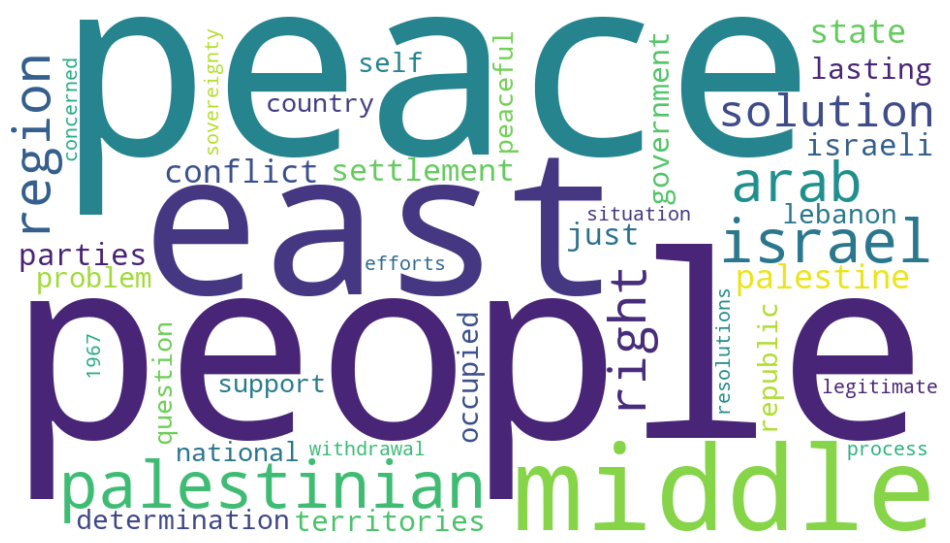

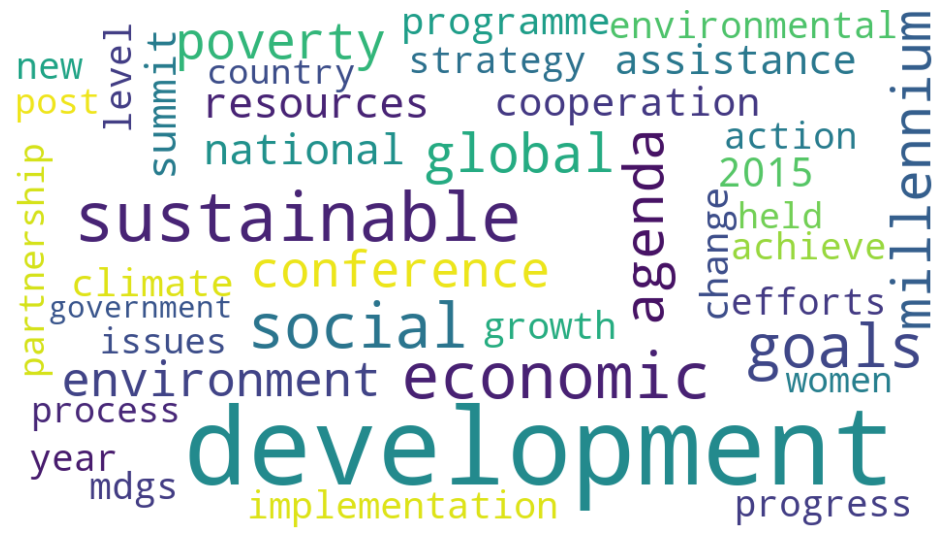

In [41]:
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())

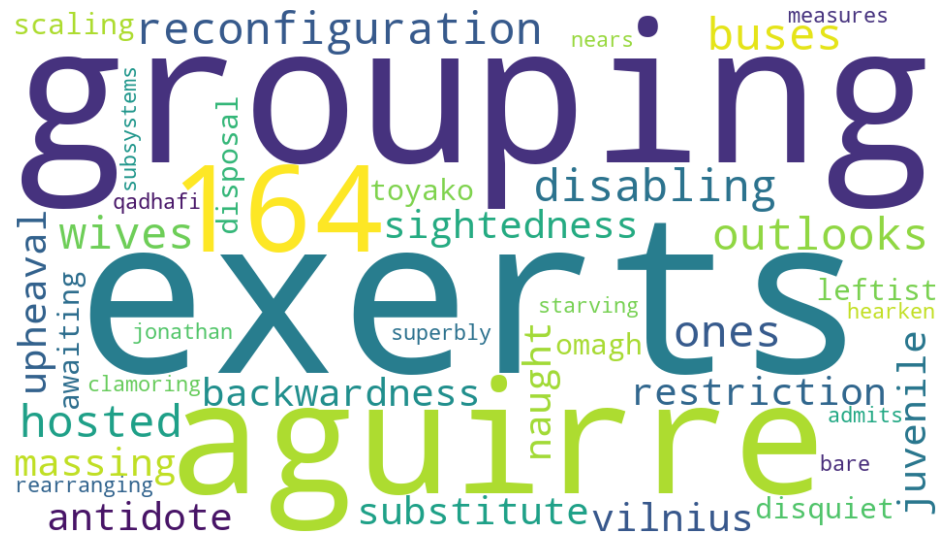

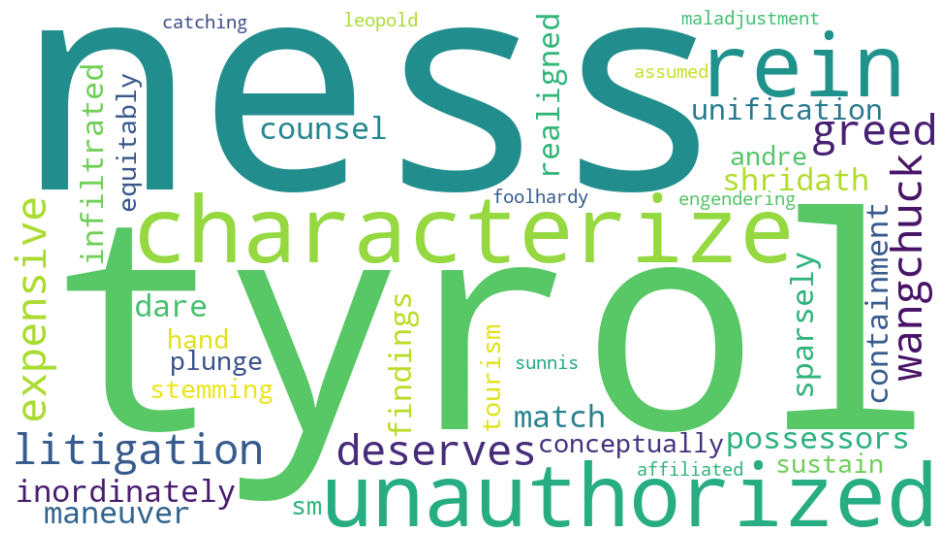

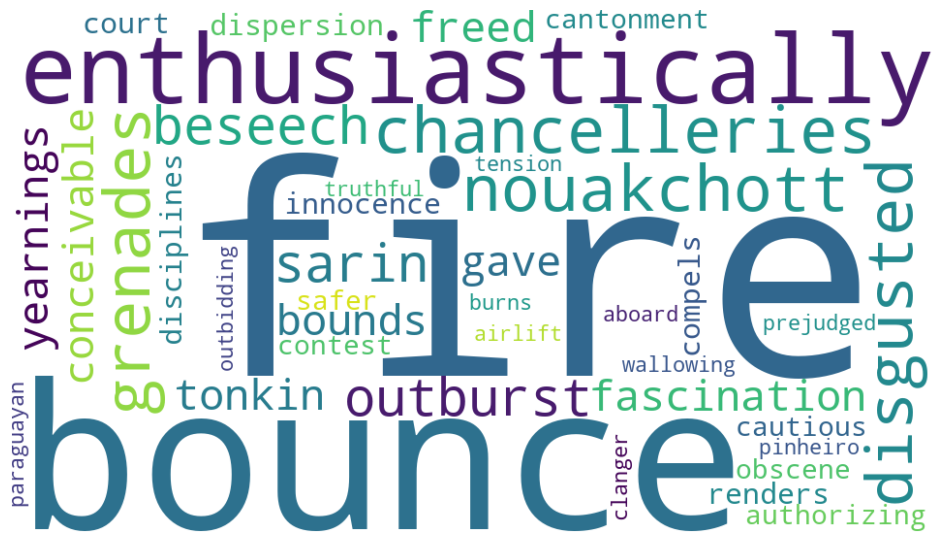

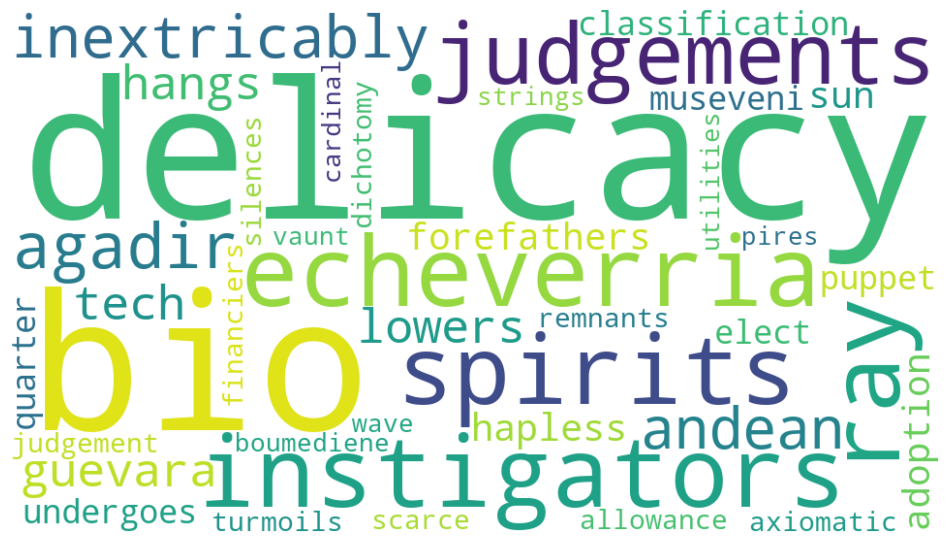

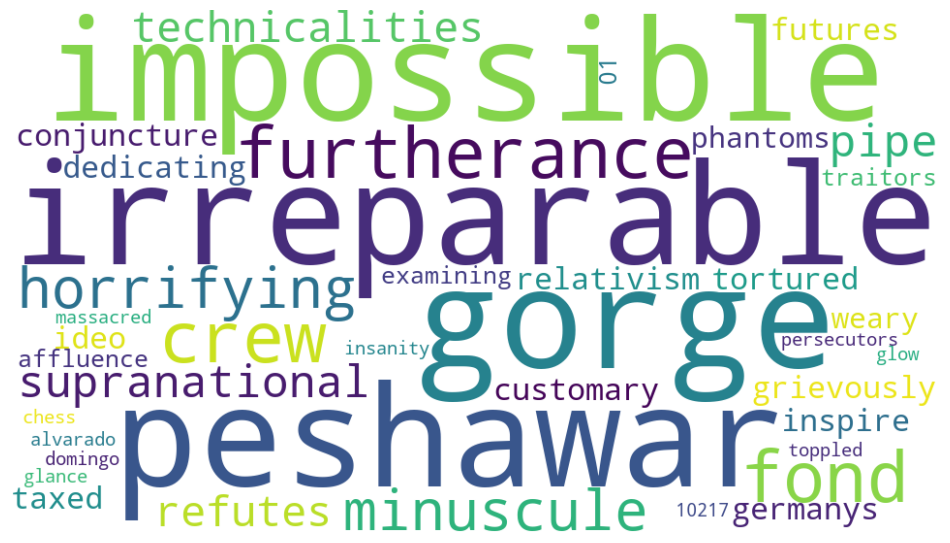

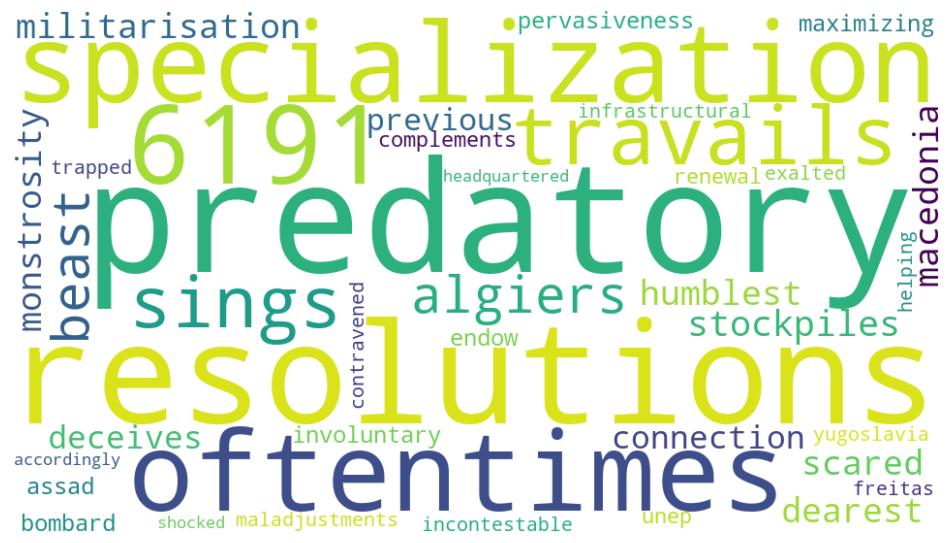

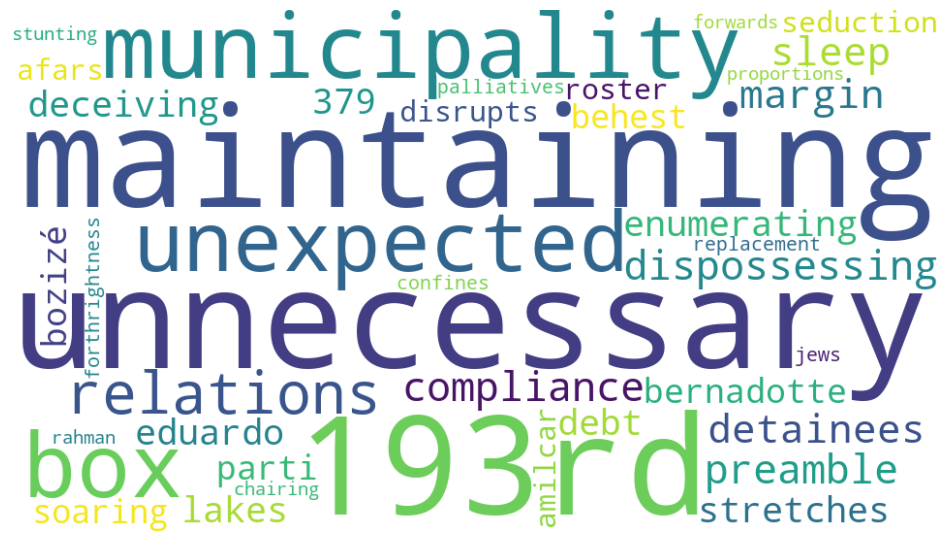

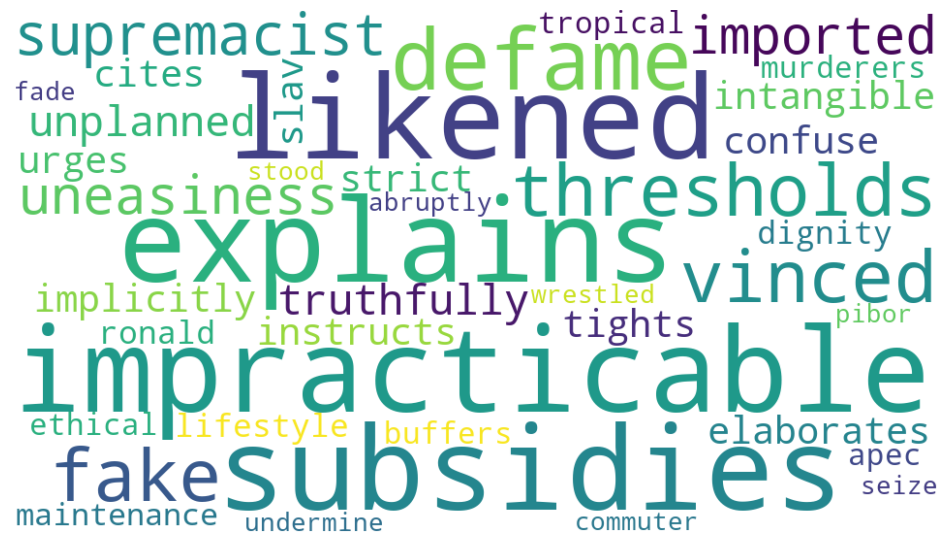

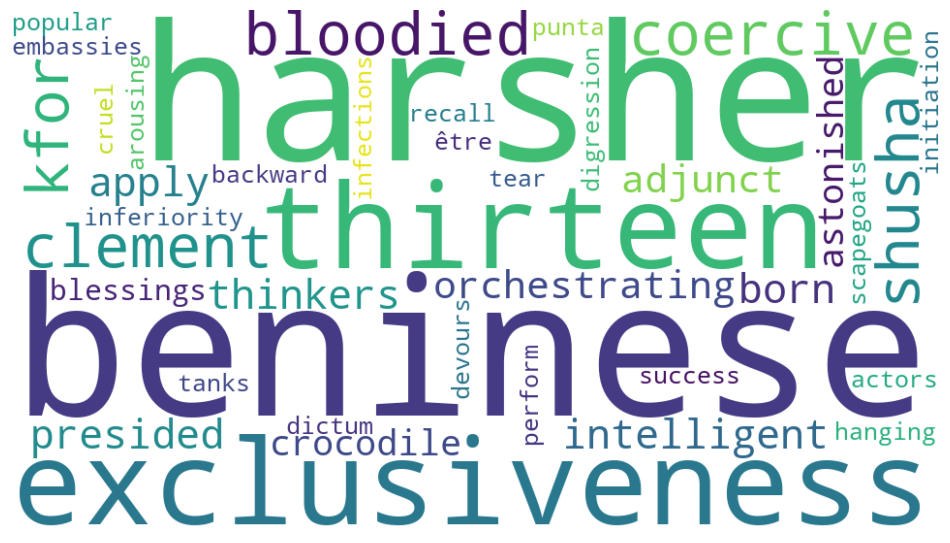

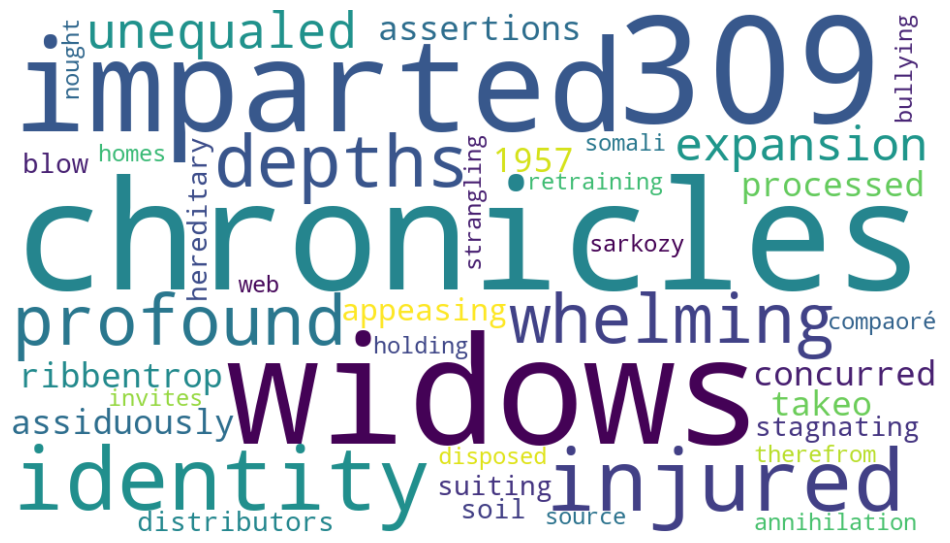

In [42]:
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

In [43]:
topic_names = []
voc = tfidf_para_vectorizer.get_feature_names_out()
for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append("Topic " + top_word)

In [44]:
from tqdm.auto import tqdm
import numpy as np

year_data = []

unique_years = np.unique(paragraph_df["year"])

for year in tqdm(unique_years):
    year_indices = np.array(paragraph_df["year"] == year)
    if np.any(year_indices):  # Check if there are samples available for the current year
        W_year = nmf_para_model.transform(tfidf_para_vectors[year_indices])
        year_data.append([year] + list(W_year.sum(axis=0) / W_year.sum() * 100.0))

  0%|          | 0/46 [00:00<?, ?it/s]

## Draw time chart

<Axes: xlabel='price'>

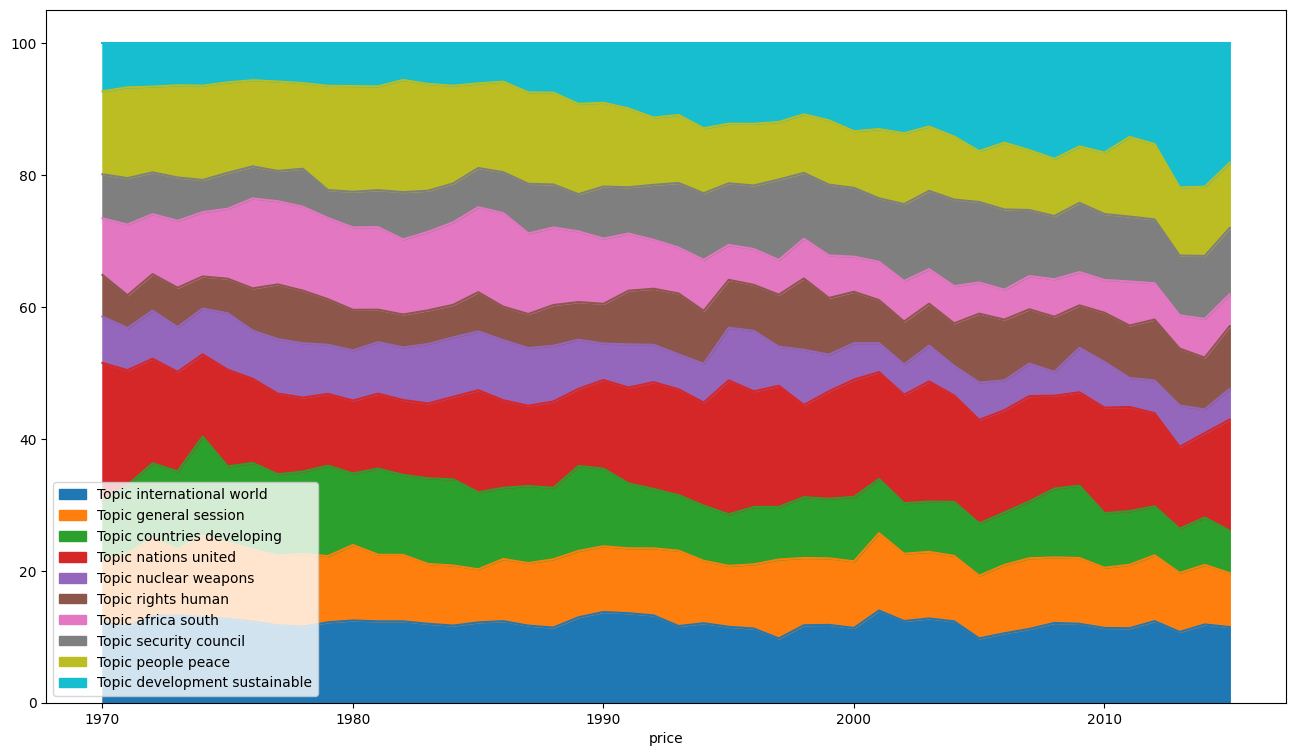

In [45]:
import matplotlib.pyplot as plt
df_year = pd.DataFrame(year_data, columns=["price"] +
topic_names).set_index("price")
df_year.plot.area(figsize=(16,9))